# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('08-x_train-IEMOCAP_RAVDESS-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('08-x_test-IEMOCAP_RAVDESS-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('08-y_train-IEMOCAP_RAVDESS-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('08-y_test-IEMOCAP_RAVDESS-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)


# **NORMALIZACION DE CARACTERISTICAS**

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_train)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [4]:
x_train_std

array([[-1.14802026e-02, -2.17794669e-01,  3.56421445e-01, ...,
        -6.38066018e-02, -3.59005396e-01,  6.88939794e-01],
       [-7.97804190e-01, -8.15343450e-01,  4.15773507e-01, ...,
        -3.12687895e-01, -6.52748343e-02, -2.33068659e+00],
       [-7.73839962e-01, -8.06410416e-02, -1.89241301e-03, ...,
        -9.80946845e-01, -4.83077464e-01, -7.09801241e-01],
       ...,
       [-1.43620156e-01,  2.41239668e-01, -7.97259427e-01, ...,
        -5.48982433e-01, -7.30055725e-02,  6.84937406e-01],
       [ 7.19569573e-01,  1.22464028e+00, -1.37515392e+00, ...,
         5.47745688e-01, -1.86846976e+00, -2.14116453e-02],
       [-2.41787209e-01, -4.00736011e-02, -7.51622914e-02, ...,
         1.25795990e+00,  3.84498795e-02,  2.83390927e-01]])

# **MODELO DE MARCHINE LEARNING**

In [5]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               13312     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 83,236
Trainable params: 83,236
Non-trainable params: 0
_________________________________________________________________


In [6]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_train)
#y_test = to_categorical(y_test)

clf.fit(x_train_std, y_t_Categorical , epochs=800)#1000
y_predict = clf.predict(x_test_std)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I
#1000 70
#1000 67
#1250 69
#1300 66
#995 68

Epoch 1/800
73/73 [==============================] - 1s 3ms/step - loss: 1.0145 - accuracy: 0.5633
Epoch 2/800
73/73 [==============================] - 0s 3ms/step - loss: 0.8817 - accuracy: 0.6265
Epoch 3/800
73/73 [==============================] - 0s 3ms/step - loss: 0.8365 - accuracy: 0.6433
Epoch 4/800
73/73 [==============================] - 0s 3ms/step - loss: 0.8004 - accuracy: 0.6610
Epoch 5/800
73/73 [==============================] - 0s 3ms/step - loss: 0.7754 - accuracy: 0.6762
Epoch 6/800
73/73 [==============================] - 0s 3ms/step - loss: 0.7368 - accuracy: 0.6896
Epoch 7/800
73/73 [==============================] - 0s 3ms/step - loss: 0.7142 - accuracy: 0.7013
Epoch 8/800
73/73 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.7168
Epoch 9/800
73/73 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.7207
Epoch 10/800
73/73 [==============================] - 0s 3ms/step - loss: 0.6331 - accuracy: 0.7376
Epoch 11/

array([2, 3, 1, 2, 3, 0, 2, 3, 0, 0, 2, 2, 2, 3, 0, 1, 3, 3, 3, 2, 0, 1,
       2, 1, 3, 1, 2, 3, 2, 1, 1, 1, 1, 2, 3, 0, 2, 0, 2, 3, 1, 1, 2, 3,
       2, 2, 3, 2, 0, 2, 2, 0, 2, 3, 3, 2, 0, 2, 2, 1, 0, 0, 2, 1, 2, 1,
       2, 1, 0, 2, 3, 2, 3, 2, 3, 0, 0, 2, 2, 1, 2, 3, 2, 2, 2, 3, 0, 2,
       2, 2, 2, 0, 3, 0, 3, 1, 2, 0, 2, 2, 2, 3, 0, 2, 3, 2, 2, 2, 2, 3,
       2, 0, 1, 0, 2, 2, 0, 2, 2, 3, 3, 2, 2, 1, 3, 3, 0, 3, 3, 3, 1, 3,
       1, 2, 2, 3, 3, 2, 1, 0, 2, 2, 1, 1, 2, 0, 2, 0, 2, 2, 3, 0, 2, 2,
       3, 2, 2, 2, 3, 3, 1, 3, 2, 1, 1, 2, 3, 2, 0, 2, 3, 2, 1, 2, 2, 1,
       0, 0, 3, 0, 1, 3, 2, 0, 2, 1, 1, 3, 3, 1, 3, 3, 2, 2, 2, 0, 1, 2,
       3, 2, 2, 3, 1, 0, 1, 1, 2, 2, 2, 0, 2, 2, 3, 0, 1, 1, 2, 3, 3, 2,
       0, 1, 1, 3, 2, 3, 2, 2, 3, 3, 0, 1, 3, 2, 3, 1, 0, 2, 3, 3, 0, 2,
       2, 2, 2, 2, 3, 3, 0, 1, 0, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 0, 1,
       0, 2, 2, 2, 2, 3, 1, 1, 2, 3, 3, 2, 3, 1, 3, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 3, 1, 3, 2, 2, 2, 2, 0, 3, 2, 0, 3, 2,

# **EVALUACION**

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        81
           1       0.49      0.43      0.46       101
           2       0.68      0.65      0.67       237
           3       0.69      0.76      0.72       160

    accuracy                           0.66       579
   macro avg       0.65      0.65      0.65       579
weighted avg       0.65      0.66      0.66       579



In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        81
           1       0.49      0.43      0.46       101
           2       0.68      0.65      0.67       237
           3       0.69      0.76      0.72       160

    accuracy                           0.66       579
   macro avg       0.65      0.65      0.65       579
weighted avg       0.65      0.66      0.66       579

Matriz de confusión, sin normalización
[[ 63   6  12   0]
 [ 12  43  36  10]
 [ 10  27 155  45]
 [  2  11  26 121]]


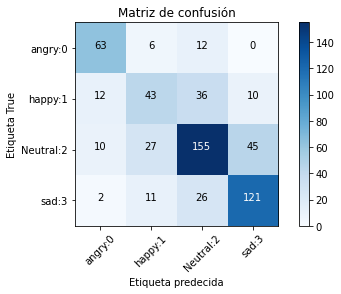

In [9]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')